<a href="https://colab.research.google.com/github/Pranayshukla0610/ML-projects-portfolio/blob/main/NYC_Yellow_Taxi_Trip_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
df = pd.read_csv(
    '/content/data.csv',
    engine='python',
    on_bad_lines='skip'
)

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,.60,1,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,.80,1,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,.00,1,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0


In [ ]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826692 entries, 0 to 826691
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               826692 non-null  object 
 1   tpep_pickup_datetime   826691 non-null  object 
 2   tpep_dropoff_datetime  826691 non-null  object 
 3   passenger_count        826688 non-null  float64
 4   trip_distance          826687 non-null  object 
 5   RatecodeID             826687 non-null  object 
 6   store_and_fwd_flag     826684 non-null  object 
 7   PULocationID           826682 non-null  float64
 8   DOLocationID           826682 non-null  float64
 9   payment_type           826681 non-null  float64
 10  fare_amount            826677 non-null  float64
 11  extra                  826673 non-null  float64
 12  mta_tax                826672 non-null  float64
 13  tip_amount             826672 non-null  float64
 14  tolls_amount           826672 non-nu

,passenger_count,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,826688.000000,826682.000000,826682.000000,826681.000000,826677.000000,826673.000000,826672.000000,826672.000000,826672.000000,826671.000000,826664.000000
mean,1.542936,163.865131,161.846499,1.309287,12.818440,1.097860,0.493104,2.135590,0.367920,0.297935,18.746084
std,1.170719,65.667429,70.290562,0.494832,12.369556,1.246803,0.071930,2.833045,1.692449,0.060260,15.071507
min,0.000000,0.000000,0.300000,0.000000,-237.000000,-7.000000,-0.500000,-40.000000,-35.740000,-0.300000,-241.300000
25%,1.000000,132.000000,113.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.150000
50%,1.000000,162.000000,162.000000,1.000000,9.000000,0.500000,0.500000,1.850000,0.000000,0.300000,14.160000
75%,2.000000,233.000000,234.000000,2.000000,14.000000,2.500000,0.500000,2.850000,0.000000,0.300000,19.800000
max,41.000000,265.000000,265.000000,29.150000,655.350000,7.000000,5.550000,450.000000,200.600000,33.350000,656.150000


In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

numeric_cols = [
    'passenger_count', 'trip_distance', 'fare_amount',
    'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df = df.dropna()

In [ ]:
df['trip_duration_minutes'] = (
    df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
).dt.total_seconds() / 60

/tmp/ipython-input-538540628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_duration_minutes'] = (


In [ ]:
df = df[
    (df['trip_duration_minutes'] > 1) &
    (df['trip_duration_minutes'] < 180)
]

In [ ]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.weekday

In [ ]:
features = [
    'trip_distance',
    'trip_duration_minutes',
    'passenger_count',
    'fare_amount',
    'extra',
    'tip_amount',
    'tolls_amount',
    'pickup_hour'
]

target = 'total_amount'

X = df[features]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})

coef_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
5,tip_amount,1.045221
6,tolls_amount,1.005498
3,fare_amount,0.994624
4,extra,0.255219
2,passenger_count,0.051519
7,pickup_hour,0.019996
1,trip_duration_minutes,0.013380
0,trip_distance,-0.058668


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)

MAE : 0.5275128598526031
RMSE: 0.8269897005993577
R²  : 0.9967828425323815


In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.9967826846757571

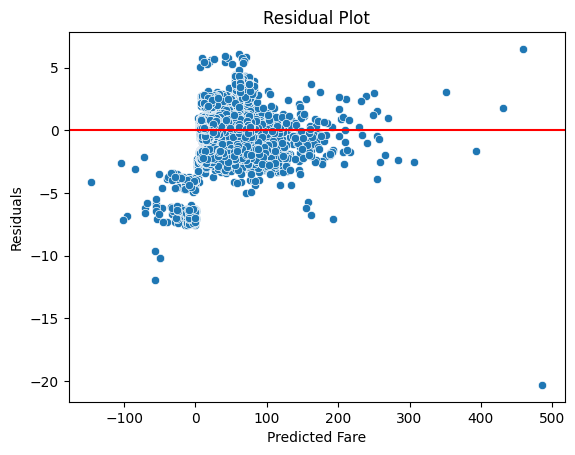

In [ ]:
residuals = y_test - y_pred

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

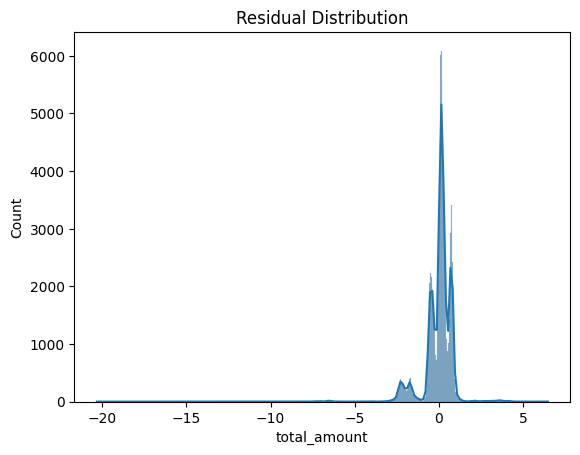

In [ ]:
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

In [ ]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.070e+07
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:37:27   Log-Likelihood:            -1.0028e+06
No. Observations:              815254   AIC:                         2.006e+06
Df Residuals:                  815245   BIC:                         2.006e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.7923      0.003    940.872      0.000       2.786       2.798
trip_distance            -0.0590      0.001    -93.831      0.000      -0.060      -0.058
trip_duration_minutes     0.0132      0.000     76.148      0.000       0.013       0.014
passenger_count           0.0525      0.001     66.235      0.000       0.051       0.054
fare_amount               0.9952      0.000   4202.366      0.000       0.995       0.996
extra                     0.2552      0.001    340.009      0.000       0.254       0.257
tip_amount                1.0429      0.000   2632.441      0.000       1.042       1.044
tolls_amount              1.0054      0.001   1410.223      0.000       1.004       1.007
pickup_hour               0.0201      0.000    133.705      0.000       0.020       0.020
==============================================================================
Omnibus:                   388753.266   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6668751.919
Skew:                          -1.876   Prob(JB):                         0.00
Kurtosis:                      16.500   Cond. No.                         86.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Feature,VIF
0,trip_distance,11.260247
1,trip_duration_minutes,8.869247
2,passenger_count,2.274801
3,fare_amount,18.971475
4,extra,1.748828
5,tip_amount,2.243383
6,tolls_amount,1.758488
7,pickup_hour,3.478142
